In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os

In [ ]:
!pip install split-folders

In [ ]:

# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-10 14:52:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  20.2MB/s    in 13s     

2020-10-10 14:52:39 (23.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakkukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [ ]:
import splitfolders 
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors" , seed=1314, ratio= (.6, .4))
train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:02, 919.13 files/s]


In [ ]:
rock = os.path.join(base_dir,'rock')
paper = os.path.join(base_dir, 'paper')
scissors = os.path.join(base_dir, 'scissors')

In [ ]:
# memecah direktori menjadi data train dan data validation

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors), test_size = 0.2)

In [ ]:
t_rock = os.path.join(train_dir, 'rock')
t_paper = os.path.join(train_dir, 'paper')
t_scissors = os.path.join(train_dir, 'scissors')
v_rock = os.path.join(validation_dir, 'rock')
v_paper = os.path.join(validation_dir, 'paper')
v_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rock',
 'README_rpc-cv-images.txt',
 'rps-cv-images',
 'scissors',
 'val',
 'train',
 'paper']

In [ ]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 42s - loss: 1.1205 - accuracy: 0.3650 - val_loss: 1.0221 - val_accuracy: 0.3875
Epoch 2/20
25/25 - 41s - loss: 0.7609 - accuracy: 0.6775 - val_loss: 0.5077 - val_accuracy: 0.8062
Epoch 3/20
25/25 - 41s - loss: 0.3762 - accuracy: 0.8612 - val_loss: 0.1674 - val_accuracy: 0.9500
Epoch 4/20
25/25 - 41s - loss: 0.3249 - accuracy: 0.8763 - val_loss: 0.2870 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 41s - loss: 0.2269 - accuracy: 0.9125 - val_loss: 0.2936 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 41s - loss: 0.1795 - accuracy: 0.9362 - val_loss: 0.1518 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 41s - loss: 0.1700 - accuracy: 0.9438 - val_loss: 0.2164 - val_accuracy: 0.9125
Epoch 8/20
25/25 - 41s - loss: 0.1514 - accuracy: 0.9500 - val_loss: 0.0995 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 41s - loss: 0.0891 - accuracy: 0.9688 - val_loss: 0.2592 - val_accuracy: 0.9062
Epoch 10/20
25/25 - 41s - loss: 0.1237 - accuracy: 0.9588 - val_loss: 0.1291 - val_accuracy: 0.9438
Epoch 11/

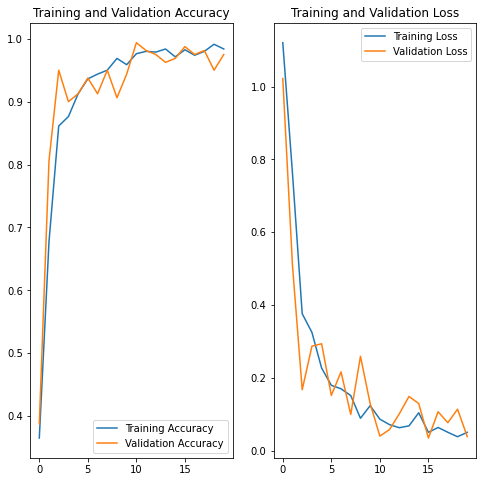

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 202010102126158af22e2012e537cf9f3c49ca073b3c77.jpeg to 202010102126158af22e2012e537cf9f3c49ca073b3c77 (1).jpeg
202010102126158af22e2012e537cf9f3c49ca073b3c77.jpeg
scissors


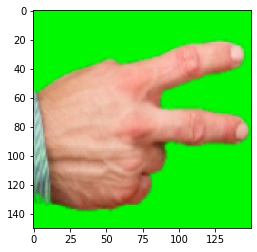

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')